In [1]:
import sys, os
insert_path = os.path.dirname(os.path.abspath(""))
sys.path.insert(0, insert_path)

%matplotlib notebook

from model.models.threes import ThreesModel
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from model.nba_api_helpers import get_player_shot_loc_data, get_league_shot_loc_data, generate_3_point_classifier
from sklearn.mixture import GaussianMixture as GMM
from sklearn.model_selection import GridSearchCV
from model.utils.plotting import draw_court
import matplotlib.font_manager as fm
from highlight_text import fig_text, ax_text
import json

font_path = os.path.join(os.path.abspath(os.path.dirname("")), "assets/fonts")
style_path = os.path.join(os.path.abspath(os.path.dirname("")), "assets/stylesheets/nba.mplstyle")
for x in os.listdir(font_path):
    for y in os.listdir(f"{font_path}/{x}"):
        if y.split(".")[-1] == "ttf":
            fm.fontManager.addfont(f"{font_path}/{x}/{y}")
            try:
                fm.FontProperties(weight=y.split("-")[-1].split(".")[0].lower(), fname=y.split("-")[0])
            except Exception:
                continue

if os.path.isfile(style_path):
    plt.style.use(style_path)
else:
    print('Could not locate style sheet')
    
player_name = "Buddy Hield"
opponent = "ORL"

In [2]:
fgms = json.loads(open("data.json", "r").read())['data']
fgms[:5]

[1, 2, 1, 9, 0]

<IPython.core.display.Javascript object>


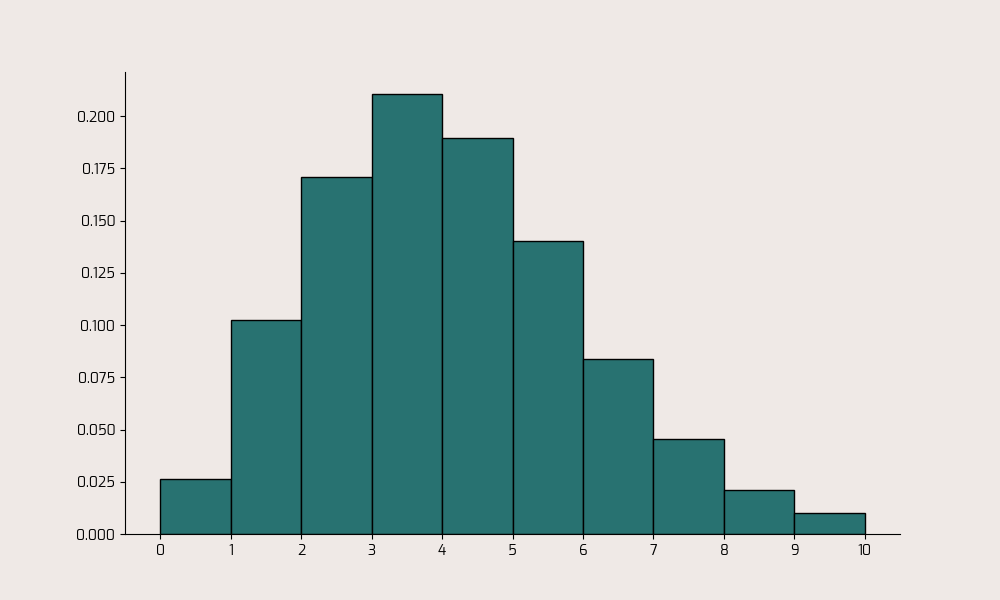

In [3]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.hist(fgms, bins=np.arange(0, 11), histtype='bar', ec='black', density=True)
ax.set_xticks(np.arange(0, 11))
plt.show()

C:\Users\Ben\OneDrive\Desktop\Data Pros\nba-betting-models\venv\lib\site-packages\matplotlib\animation.py:880: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


<IPython.core.display.Javascript object>


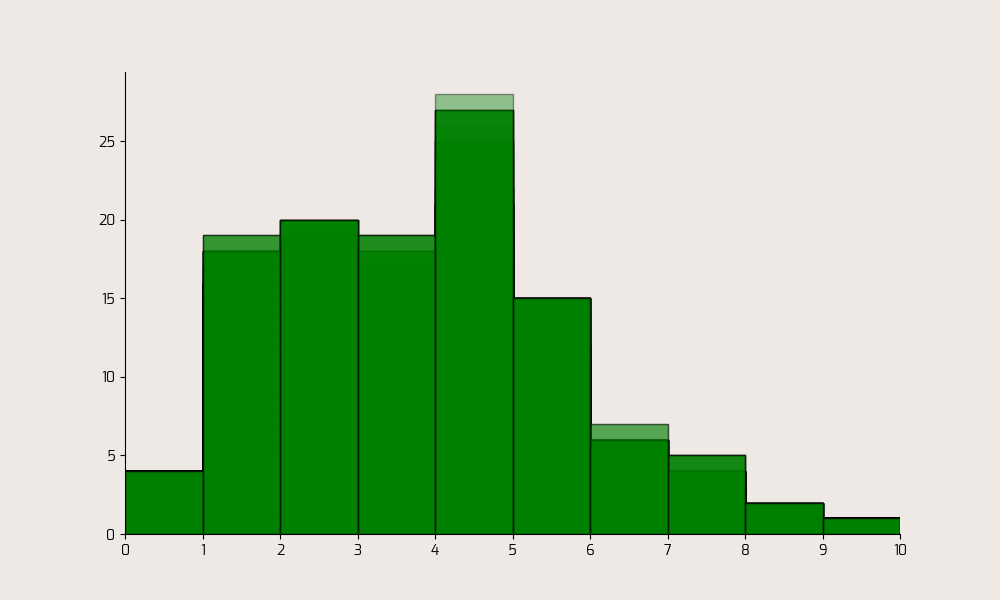

In [5]:
import matplotlib.animation as animation

number_of_frames = 10_000
data = fgms

def update_hist(num, data):
    ax.hist(fgms[:num], bins=np.arange(0, 11), color='green', alpha=0.4, histtype='bar', ec='black')
    ax.set_xticks(np.arange(0, 11))
    ax.set_xlim(0, 10)

fig, ax =plt.subplots(figsize=(10, 6))
ax.hist(fgms[0], bins=np.arange(0, 11), histtype='bar', color='green', alpha=0.4, ec='black')
ax.set_xticks(np.arange(0, 11))
ax.set_xlim(0, 10)
animation = animation.FuncAnimation(fig, update_hist, number_of_frames, fargs=(fgms, ) )
plt.show()